# Oasis Infobyte - Intership Project

Task 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

 The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project.

In [1]:
#import libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cd = pd.read_csv('C:/Users/cws/Downloads/car data.csv')
cd.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
cd.shape

(301, 9)

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#missing value
cd.isna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [6]:
cd.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
cd.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
cd.corr()

C:\Users\cws\AppData\Local\Temp\ipykernel_11552\1529341566.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cd.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [9]:
cd.cov()

C:\Users\cws\AppData\Local\Temp\ipykernel_11552\225911690.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cd.cov()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,8.361085,3.470617,-1.179364,-5.895887e+04,-0.130543
Selling_Price,3.470617,25.834973,38.609504,5.768966e+03,-0.111323
Present_Price,-1.179364,38.609504,74.694264,6.843250e+04,0.017266
Driven_kms,-58958.869767,5768.965732,68432.499616,1.512190e+09,860.101074
Owner,-0.130543,-0.111323,0.017266,8.601011e+02,0.061462


In [10]:
print(cd.Fuel_Type.value_counts())
print(cd.Selling_type.value_counts())
print(cd.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
cd.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cd.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
cd.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

cd
            

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [12]:
x = cd.drop(['Car_Name','Selling_Price'], axis = 1)
y = cd['Selling_Price']

In [13]:
x


,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [14]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Linear Model

In [15]:
pip install scikit-learn==1.3.0rc1

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
x_train.shape

(210, 7)

In [18]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_head = regr.predict(x_train)

In [21]:
from sklearn.metrics import r2_score
rsq = r2_score(y_train,y_head)
print('R square Error :',rsq)

R square Error : 0.8860116999099481


Text(0, 0.5, 'Predicted Price')

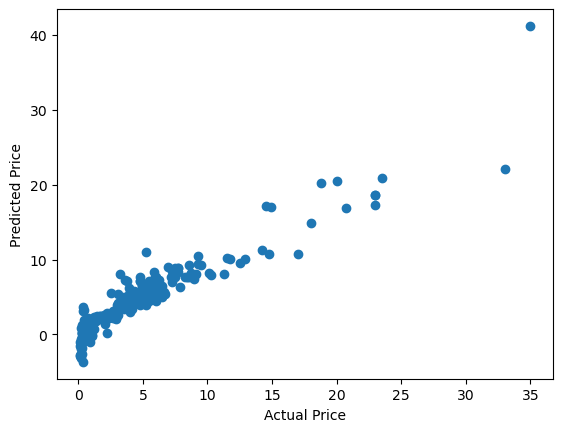

In [22]:
plt.scatter(y_train,y_head)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [23]:
cd.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


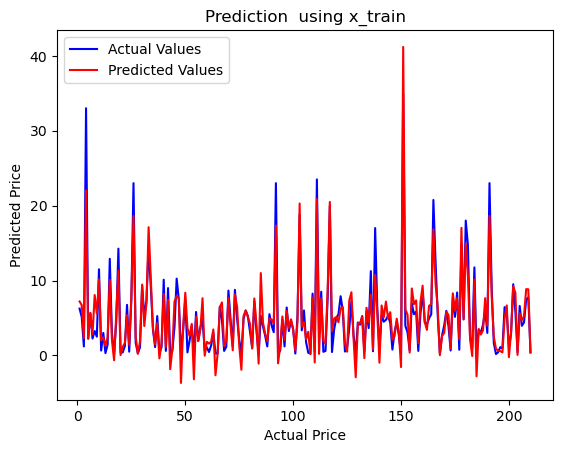

In [27]:
d = [i for i in range (1,len(y_train)+1,1)]
plt.plot(d,y_train,color='b',linestyle='-',label="Actual Values")
plt.plot(d,y_head,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction  using x_train')
plt.legend()
plt.show()

R square Error y_test : 0.8191491844929043


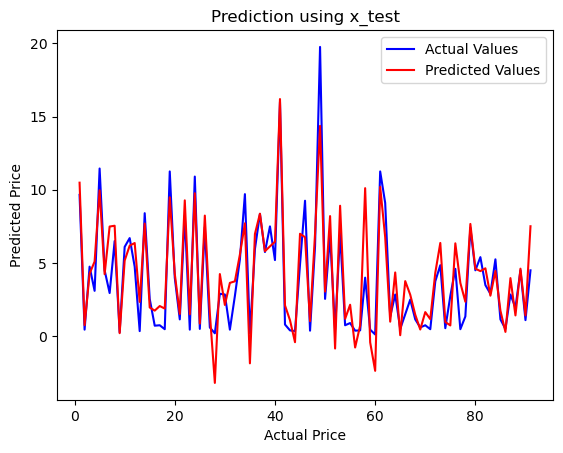

In [29]:
sy_head = regr.predict(x_test)

rsq = r2_score(y_test,sy_head)
print('R square Error y_test :',rsq)

d = [i for i in range (1,len(y_test)+1,1)]
plt.plot(d,y_test,color='b',linestyle='-',label="Actual Values")
plt.plot(d,sy_head,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction using x_test')
plt.legend()
plt.show()

# Thanks